# DESENVOLVIMENTO E EXECUÇÃO DE PROJETOS DE SOFTWARE 2022.2

Docente: Ryan Ribeiro De Azevedo

Dicente: Thiago Fabricio de Oliveira

# Exercicio 01

Para fazer essa atividade, foi-se utilizado a biblioteca Librosa do python, como a principal biblioteca referente ao processamento de audio.

Ela é uma biblioteca de processamento de áudio em Python amplamente utilizada para análise, manipulação e extração de recursos de áudio. Pois a mesma fornece uma ampla gama de funções e ferramentas para trabalhar com dados de áudio de forma eficiente, como por exemplo:

- Carregamento e conversão de áudio: A Librosa permite o carregamento de áudios em diferentes formatos, como WAV, MP3, OGG, entre outros. Fornecendo tambem funções para converter a taxa de amostragem, tipo de dados e duração dos áudios.

- Pré-processamento de áudio: A biblioteca tambem oferece diversas técnicas de pré-processamento, como a de normalização, remoção de silêncio, filtragem, equalização e muitas outras. Essas técnicas ajudam a preparar os áudios para análise e extração de recursos.

- Extração de recursos de áudio: A Librosa possui funções para extrair diversos recursos úteis de áudio, como espectrograma, mel spectrograma, croma, MFCC (Mel-frequency cepstral coefficients), ritmo, tonalidade, entre outros. Esses recursos são amplamente utilizados em tarefas de processamento de áudio, como classificação, reconhecimento de voz, separação de fontes, entre outros.

- Visualização de áudio: A biblioteca inclui funções para visualizar áudio em forma de gráficos, como gráfico da forma de onda, espectrograma, croma, entre outros. Isso permite uma melhor compreensão dos dados de áudio e facilita a análise visual.

Devido aos exemplos utilizados a Librosa acaba se destacando frente as outras bibliotecas de processsamento de audio como a Essentia e a PyDub.

Prosseguimos então a atividade fazendo a priore o importamento da biblioteca Librosa, e também fazendo o carramento do audio para a atividade.

O audio por sua vez foi um audio gravado em um simples software de gravação de audio, sem que o software tratasse ou tivesse algum melhoramento desse audio, para a finalidade de se exemplificar um arquivo de audio de uma forma mais "bruta".

No carregamento do audio pela biblioteca Librosa teremos que ele sera divido em duas variaveis, que sera:

- audio: Essa variavel recebe os dados do audio em formato digital.

- sr: Essa variavel por sua vez representa a taxa de amostragem em Hz do audio.

In [5]:
# Carramento da biblioteca Librosa
import librosa

# Carregar o áudio
audio_path = 'atividade-01.mp3'
audio, sr = librosa.load(audio_path)

Agora para ver se o audio foi carregado certo e se esta com com seu som em sua normalidade, utilizaremos da biblioteca sounddevide para fazer o carregamento desse audio.

In [6]:
import sounddevice as sd

# Reproduzir o áudio
sd.play(audio, sr)
sd.wait()

Nesse ponto obtive uma surpresa, que foi a do audio cortado no meio de sua execução, investigando um pouco a fundo o problema se apresentou com formato MP3, pois existem alguns arquivos MP3 podem ter problemas de codificação ou metadados incorretos, o que pode levar a uma leitura incorreta da duração do áudio. Fazendo que nesses casos, a biblioteca Librosa possa interpretar erroneamente a duração do áudio.

Para evitar esse tipo de problema teremos então que fazer a conversão desse audio de formato em mp3 para um formato que possui uma maior segurança da integridade dos dados do audio, que no caso é o formato WAV, como a discpiplina busca trabalhar os problemas de software e suas soluções via algoritmo, optei por fazer a conversão via algoritmo em vez de só colocar o arquivo com o formato mais adequado, e para fazer essa convesão sera utilizado a biblioteca pydub.

In [7]:
import pydub

# Caminho do arquivo de áudio em MP3
audio_path_mp3 = 'atividade-01.mp3'

# Caminho de destino para o arquivo WAV convertido
audio_path_wav = 'atividade-01.wav'

# Carregar o arquivo MP3 usando o pydub
audio = pydub.AudioSegment.from_file(audio_path_mp3, format='mp3')

# Converter o áudio para WAV
audio.export(audio_path_wav, format='wav')

<_io.BufferedRandom name='atividade-01.wav'>

Após fazer a conversão, utilizaremos dos mesmo metodos de carregamento e de reprodução de audio anteriormente mostrados para podemos verificar se tudo ocorreu como o planejado.

In [8]:
# Carregar o áudio
audio_path = 'atividade-01.wav'
audio, sr = librosa.load(audio_path)

# Reproduzir o áudio
sd.play(audio, sr)
sd.wait()

Agora que podemos ouvir o audio inteiro oque implica que o mesmo não esta mais cortando, iremos utilizar da biblioteca matplotlib.pyplot para podemos ver graticamento como que esse audio se comporta, para auxiliar o matplotlib iremos justamente utilizar da librosa.display que é a parte do librosa responsavel por fazer esse carremento de dados para plotagem de graficos, afim de observarmos a amplitude desse audio e sua duração.

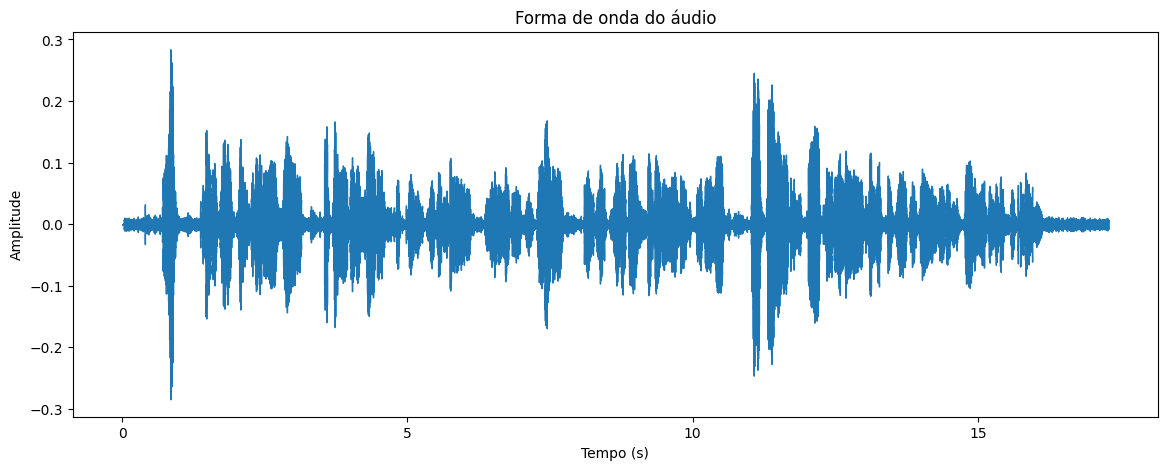

In [20]:

import matplotlib.pyplot as plt
import librosa.display

# Plotar o áudio
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)
plt.title('Forma de onda do áudio')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()

Fazendo uma visualização mais numerica desses dados, podemos então ver a taxa de amostragem desse audio e sua duração atravez da função print, nas devidas variaveis correspontes.

In [10]:

# Obter a taxa de amostragem
sampling_rate = sr

# Calcular a duração do áudio
duration = len(audio) / sr

print(len(audio))

# Imprimir os resultados
print("Taxa de amostragem: {} Hz".format(sampling_rate))
print("Duração do áudio: {:.2f} segundos".format(duration))

381312
Taxa de amostragem: 22050 Hz
Duração do áudio: 17.29 segundos


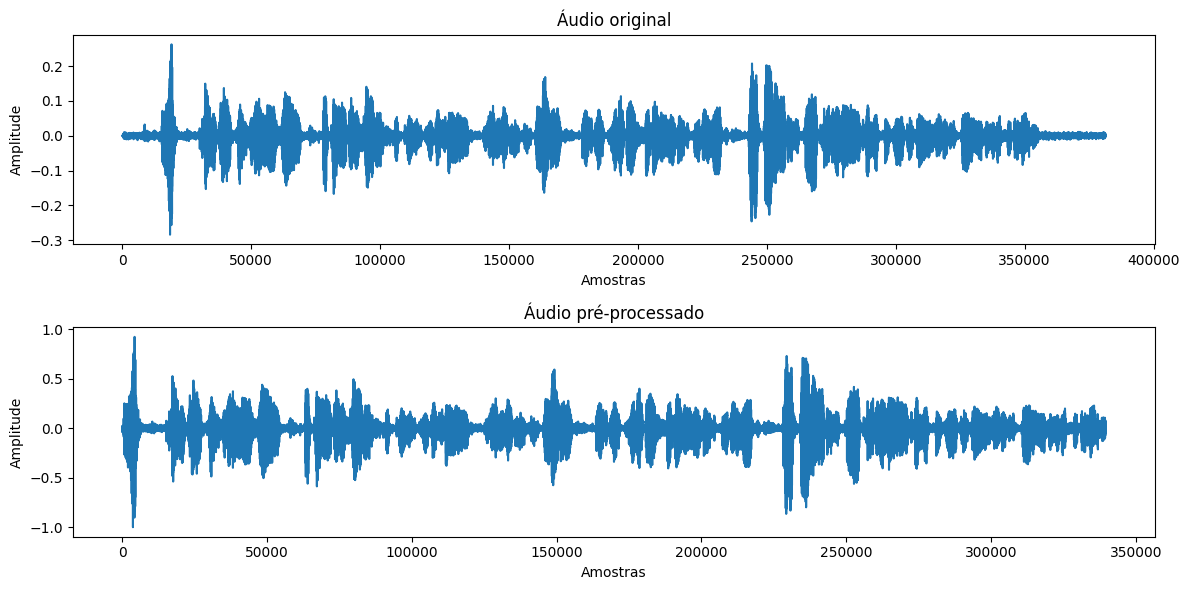

In [11]:
# Normalização
normalized_audio = librosa.util.normalize(audio)

# Remoção de silêncio
trimmed_audio, _ = librosa.effects.trim(normalized_audio, top_db=20)

# Visualização antes e depois do pré-processamento
plt.figure(figsize=(12, 6))

# Áudio original
plt.subplot(2, 1, 1)
plt.plot(audio)
plt.title('Áudio original')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

# Áudio pré-processado
plt.subplot(2, 1, 2)
plt.plot(trimmed_audio)
plt.title('Áudio pré-processado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [12]:
import sounddevice as sd

sd.play(audio, sr)
sd.wait()

In [13]:
sd.play(trimmed_audio, sr)
sd.wait()

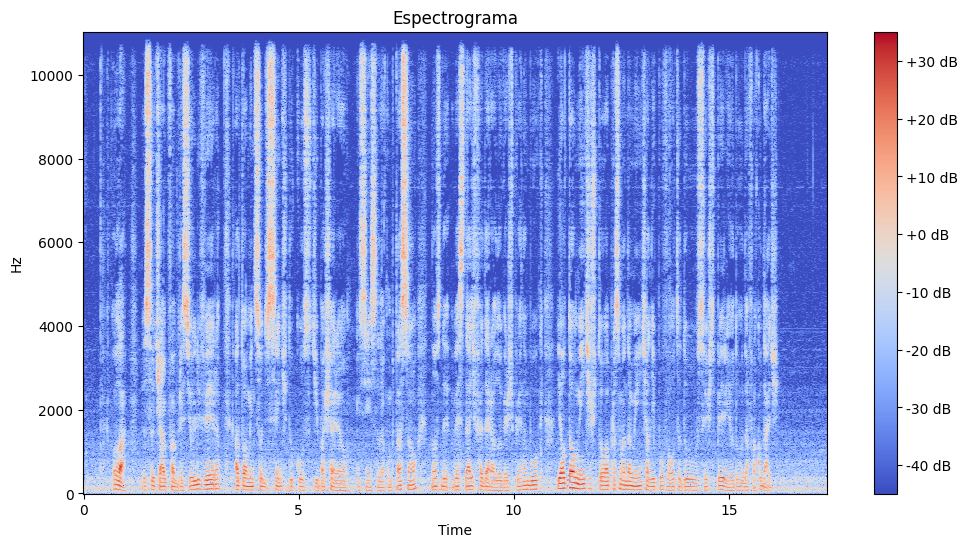

In [14]:
# Calcular o espectrograma
spectrogram = librosa.stft(audio)

# Converter para escala de decibéis
spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

# Plotar o espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()

In [15]:
import numpy as np

# Calcular o espectrograma
spectrogram = np.abs(librosa.stft(trimmed_audio))

# Calcular o mel spectrograma
mel_spectrogram = librosa.feature.melspectrogram(y=trimmed_audio, sr=sr)

# Calcular os coeficientes MFCC
mfcc = librosa.feature.mfcc(y=trimmed_audio, sr=sr)

# Calcular o contraste espectral
spectral_contrast = librosa.feature.spectral_contrast(y=trimmed_audio, sr=sr)

# Calcular o rolloff espectral
rolloff = librosa.feature.spectral_rolloff(y=trimmed_audio, sr=sr)

# Calcular a tonalidade
tonnetz = librosa.feature.tonnetz(y=trimmed_audio, sr=sr)

# Extrair o chroma
chroma = librosa.feature.chroma_stft(y=trimmed_audio, sr=sr)

# Exibir as dimensões das características extraídas
print('Dimensões das características:')
print('Espectrograma:', spectrogram.shape)
print('Mel Spectrograma:', mel_spectrogram.shape)
print('MFCC:', mfcc.shape)
print('Contraste Espectral:', spectral_contrast.shape)
print('Rolloff Espectral:', rolloff.shape)
print('Tonalidade:', tonnetz.shape)
print("Chroma:", chroma.shape)

Dimensões das características:
Espectrograma: (1025, 664)
Mel Spectrograma: (128, 664)
MFCC: (20, 664)
Contraste Espectral: (7, 664)
Rolloff Espectral: (1, 664)
Tonalidade: (6, 664)
Chroma: (12, 664)


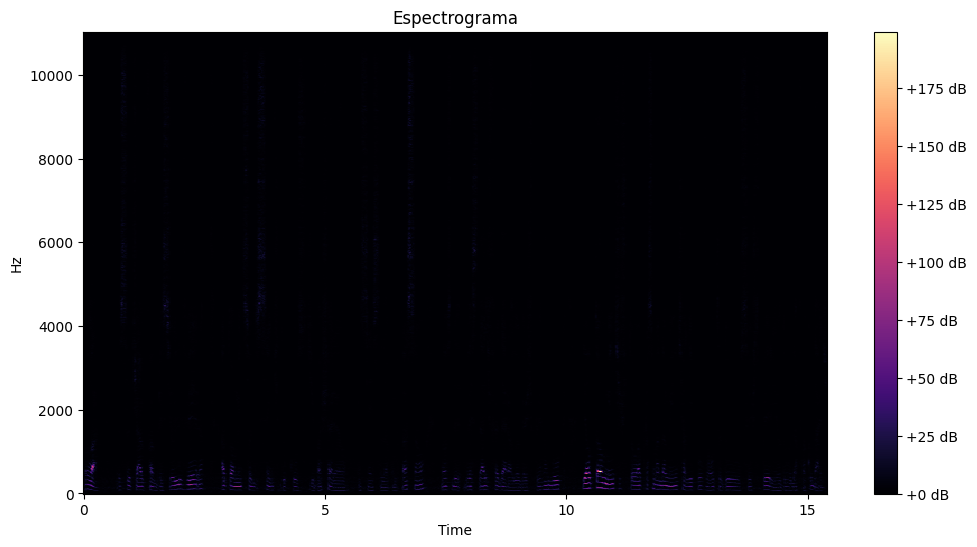

In [16]:
# Plotar o espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()

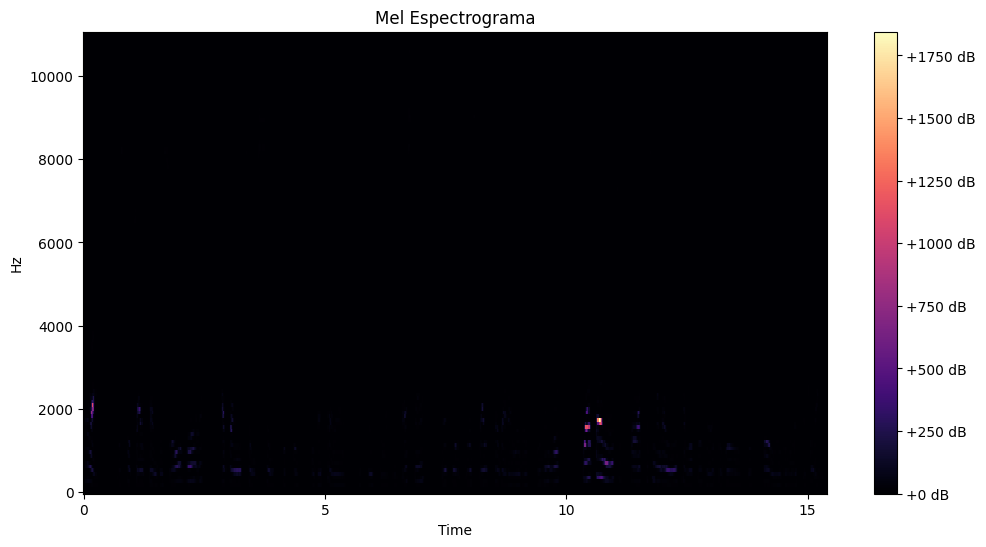

In [17]:
# Plotar o mel spectrograma

plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Espectrograma')
plt.show()

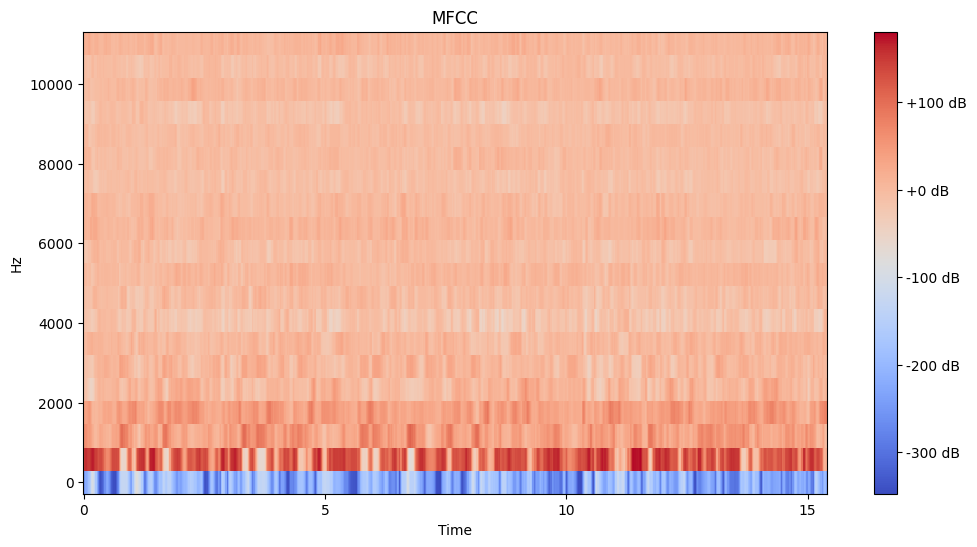

In [18]:
# Plotar os coeficientes MFCC

plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()